In [1]:
import scipy.io as sio
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
plt.rc('text', usetex=False)
from mpl_toolkits.mplot3d import Axes3D

***Geometric Anomaly Detection Function***

In [8]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from ripser import ripser

def geometric_anomaly_detection(P, r, s, k):
    # Initialize the subsets of points Pman, Pbnd, and Pint
    Pman, Pbnd, Pint = set(), set(), set()
    
    # Create a NearestNeighbors instance and fit it to the dataset P
    nn = NearestNeighbors(radius=s)
    nn.fit(P)
    
    # Iterate over all points in P
    for i, y in enumerate(P):
        # Find the annulus Ay for the point y
        indices = nn.radius_neighbors([y], radius=s, return_distance=False)[0]
        Ay = P[indices]
        Ay = Ay[np.linalg.norm(Ay - y, axis=1) >= r]
        
        # Compute persistent cohomology for the annulus Ay
        diagrams = ripser(Ay)['dgms']
        
        # Calculate Ny, the number of sufficiently long intervals in the barcode for dimension (k-1)
        Ny = sum(1 for interval in diagrams[k-1] if interval[1] - interval[0] > (s - r))
        
        # Classify the point y based on Ny
        if Ny == 0:
            Pbnd.add(i)
        elif Ny == 1:
            Pman.add(i)
        else:
            Pint.add(i)
    
    # Return the partition of P into subsets Pman, Pbnd, and Pint
    return Pman, Pbnd, Pint



In [3]:
#Cyclo-Octane data
co_data = sio.loadmat('Data_Sets/pointsCycloOctane.mat')
print(f'Cyclo-Octane data keys: {co_data.keys()}')
print()
co_point_cloud = co_data['pointsCycloOctane']
print(co_point_cloud.shape)
print()

#Henneberg point cloud data
h_data = sio.loadmat('Data_Sets/henneberg_point_cloud.mat')
print(f'Henneberg data keys: {h_data.keys()}')
h_point_cloud = h_data['X']
print(h_point_cloud.shape)

Cyclo-Octane data keys: dict_keys(['__header__', '__version__', '__globals__', 'pointsCycloOctane'])

(6040, 24)

Henneberg data keys: dict_keys(['__header__', '__version__', '__globals__', 'X'])
(3, 5456)


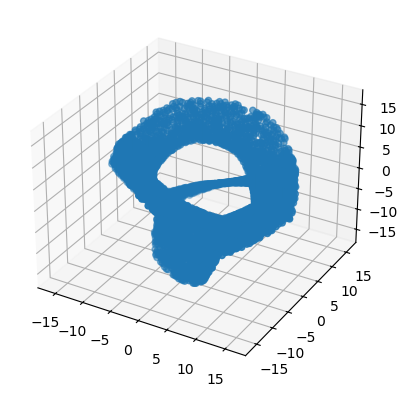

In [6]:
#plot h_point_cloud in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(h_point_cloud_iso[:,0], h_point_cloud_iso[:,1], h_point_cloud_iso[:,2])
plt.show()

***IsoMap for Cyclo-Octane Data 3D***

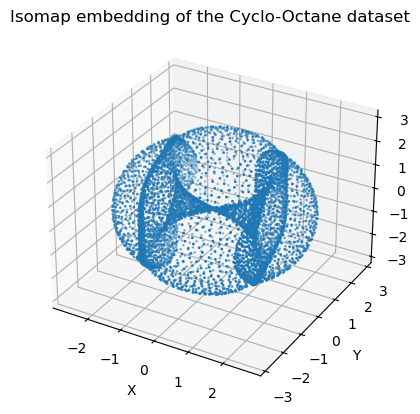

In [7]:


isomap3D = Isomap(n_neighbors=12, n_components=3)
X_iso3D = isomap3D.fit_transform(co_point_cloud)
#save the embedding to a file "iso3D.npy"
np.save('iso3D.npy', X_iso3D)

# Plot the Isomap embedding in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_iso3D[:, 0], X_iso3D[:, 1], X_iso3D[:, 2], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Isomap embedding of the Cyclo-Octane dataset')
plt.show()

***Cyclo Octane intersection***

In [27]:
# Load the 3D Isomap embedding of the Cyclo-Octane dataset
X_iso = np.load('iso3D.npy')

# Set the parameters of the algorithm
s = 0.5
r = 5*s/8
k = 2

# Detect geometric anomalies in the 3D Isomap embedding
Pman, Pbnd, Pint = geometric_anomaly_detection(X_iso, r, s, k)

# extract coordinates of the points in each subset
Pman = X_iso[list(Pman)]
Pbnd = X_iso[list(Pbnd)]
Pint = X_iso[list(Pint)]


print('Number of points in Pman:', len(Pman))
print('Number of points in Pbnd:', len(Pbnd))
print('Number of points in Pint:', len(Pint))
print('Total number of points in P:', len(Pman) + len(Pbnd) + len(Pint))



Number of points in Pman: 5162
Number of points in Pbnd: 598
Number of points in Pint: 280
Total number of points in P: 6040


In [59]:
def plot_3d_subsets(Pman, Pbnd, Pint, title= 'Geometric Anomaly Detection'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(Pman[:, 0], Pman[:, 1], Pman[:, 2], c='r', s=1, label='Pman')
    ax.scatter(Pbnd[:, 0], Pbnd[:, 1], Pbnd[:, 2], c='b', s=1, label='Pbnd')
    ax.scatter(Pint[:, 0], Pint[:, 1], Pint[:, 2], c='g', s=3, label='Pint')
    ax.legend()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title(title)

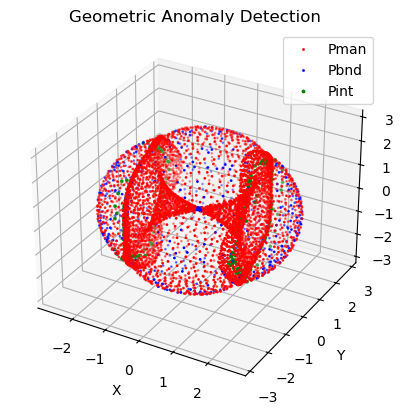

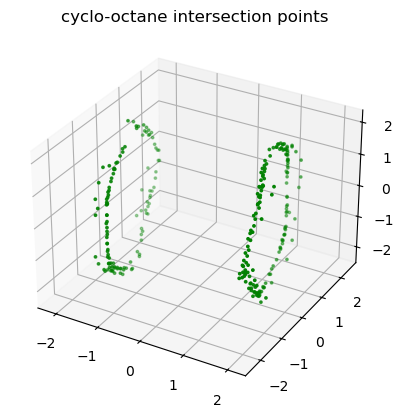

In [60]:
plot_3d_subsets(Pman, Pbnd, Pint)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Pint[:, 0], Pint[:, 1], Pint[:, 2], c='g', s=3, label='Pint')
plt.title('cyclo-octane intersection points')
plt.show()

***Henninberg point cloud data test***

In [57]:
# Load the 3D Isomap embedding of the henninberg dataset


# Set the parameters of the algorithm
s = 1.5
r = 5*s/8
k = 2

# Detect geometric anomalies in the 3D Isomap embedding
hPman, hPbnd, hPint = geometric_anomaly_detection(h_point_cloud, r, s, k)

# extract coordinates of the points in each subset
hPman = h_point_cloud[list(hPman)]
hPbnd = h_point_cloud[list(hPbnd)]
hPint = h_point_cloud[list(hPint)]


print('Number of points in Pman:', len(hPman))
print('Number of points in Pbnd:', len(hPbnd))
print('Number of points in Pint:', len(hPint))
print('Total number of points in P:', len(hPman) + len(hPbnd) + len(hPint))



/opt/anaconda3/lib/python3.11/site-packages/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(


Number of points in Pman: 3706
Number of points in Pbnd: 1595
Number of points in Pint: 155
Total number of points in P: 5456


/opt/anaconda3/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


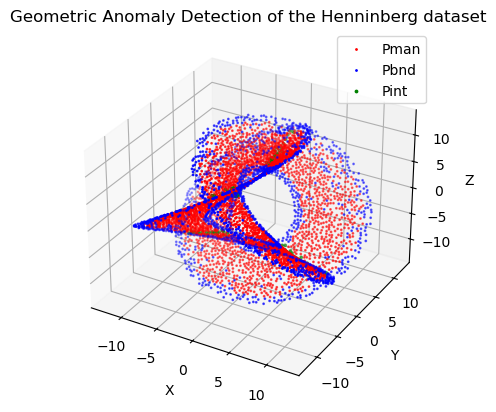

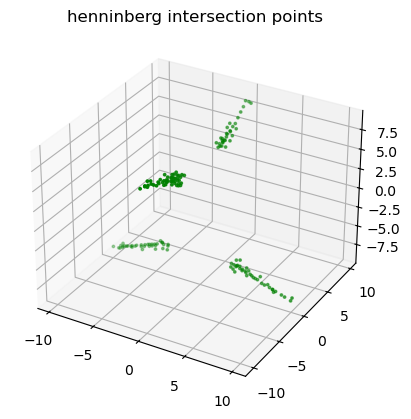

In [63]:
plot_3d_subsets(hPman, hPbnd, hPint, title='Geometric Anomaly Detection of the Henninberg dataset')

#rotate graph to see the intersection points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hPint[:, 0], hPint[:, 1], hPint[:, 2], c='g', s=3, label='Pint')
plt.title('henninberg intersection points')
plt.show()


